#Task Objectives:

#1. Further preprocessing 
#2. Segmenting the customers as High, Mid or Low value customers using RFM Analysis
#3. Recommending which of the new customers in the new customers list is a potential high value customer

*Refer to Dashboard for more details

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

Import transactions and demographics datasets

In [2]:
transactions = pd.read_csv(r"E:\My Python codes\transactions.csv")
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19799,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19800,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19801,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19803 entries, 0 to 19802
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19803 non-null  int64  
 1   product_id               19803 non-null  int64  
 2   customer_id              19803 non-null  int64  
 3   transaction_date         19803 non-null  object 
 4   online_order             19803 non-null  float64
 5   order_status             19803 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               19803 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB


In [4]:
demographics = pd.read_csv(r"E:\My Python codes\demographics.csv").drop(columns=['Unnamed: 0'], axis = 1)
demographics

,name,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,Laraine Medendorp,1,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,Eli Bockman,2,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0
2,Arlin Dearle,3,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,63.0
3,Talbot,4,Male,33,Internal Auditor,IT,Mass Customer,N,No,7.0,56.0
4,Sheila-kathryn Calton,5,Female,56,Senior Editor,Health,Affluent Customer,N,Yes,8.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,Rosalia Halgarth,3996,Female,8,VP Product Management,Health,Mass Customer,N,No,19.0,42.0
3996,Blanch Nisuis,3997,Female,87,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,16.0
3997,Sarene Woolley,3998,U,60,Assistant Manager,IT,High Net Worth,N,No,10.0,40.0
3998,Patrizius,3999,Male,11,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,10.0,44.0


In [5]:
#Add demographics attributes to transactions dataset
txn_df = pd.merge(transactions, demographics, on=['customer_id']).set_index('transaction_id').sort_index()
txn_df

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,...,Kristos Anthony,Male,19,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,62.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,Lauree O'Donnell,Female,89,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,38.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,...,Berne Donegan,Male,9,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,40.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,...,Titus Worsall,Male,83,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,55.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,...,Norma Batrim,Female,29,Legal Assistant,Retail,Affluent Customer,N,Yes,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,...,Matthiew Ferreras,Male,1,Help Desk Operator,Manufacturing,Mass Customer,N,Yes,7.0,23.0
19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,...,Merrili Whitear,Female,81,Compensation Analyst,Financial Services,Mass Customer,N,No,19.0,43.0
19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,...,Ola Lenoir,Female,83,Staff Accountant IV,Telecommunications,High Net Worth,N,No,14.0,43.0


In [6]:
txn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19800 entries, 1 to 20000
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   product_id                           19800 non-null  int64  
 1   customer_id                          19800 non-null  int64  
 2   transaction_date                     19800 non-null  object 
 3   online_order                         19800 non-null  float64
 4   order_status                         19800 non-null  object 
 5   brand                                19800 non-null  object 
 6   product_line                         19800 non-null  object 
 7   product_class                        19800 non-null  object 
 8   product_size                         19800 non-null  object 
 9   list_price                           19800 non-null  float64
 10  standard_cost                        19800 non-null  float64
 11  product_first_sold_date     

In [7]:
for idx,column in enumerate(txn_df.columns):
    print(idx,column)

0 product_id
1 customer_id
2 transaction_date
3 online_order
4 order_status
5 brand
6 product_line
7 product_class
8 product_size
9 list_price
10 standard_cost
11 product_first_sold_date
12 name
13 gender
14 past_3_years_bike_related_purchases
15 job_title
16 job_industry_category
17 wealth_segment
18 deceased_indicator
19 owns_car
20 tenure
21 age


In [8]:
#Drop columns we won't be working with
txn_df1 = txn_df.drop(txn_df.columns[[4,10,11,15,18]], axis = 1)
txn_df1

,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,name,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age
transaction_id,,,,,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,Kristos Anthony,Male,19,Financial Services,Mass Customer,Yes,10.0,62.0
2,3,3120,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,Lauree O'Donnell,Female,89,Health,Mass Customer,Yes,10.0,38.0
3,37,402,2017-10-16,0.0,OHM Cycles,Standard,low,medium,1793.43,Berne Donegan,Male,9,Retail,Affluent Customer,No,22.0,40.0
4,88,3135,2017-08-31,0.0,Norco Bicycles,Standard,medium,medium,1198.46,Titus Worsall,Male,83,Financial Services,Mass Customer,No,16.0,55.0
5,78,787,2017-10-01,1.0,Giant Bicycles,Standard,medium,large,1765.30,Norma Batrim,Female,29,Retail,Affluent Customer,Yes,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24,1.0,OHM Cycles,Standard,high,medium,2005.66,Matthiew Ferreras,Male,1,Manufacturing,Mass Customer,Yes,7.0,23.0
19997,41,127,2017-11-09,1.0,Solex,Road,medium,medium,416.98,Merrili Whitear,Female,81,Financial Services,Mass Customer,No,19.0,43.0
19998,87,2284,2017-04-14,1.0,OHM Cycles,Standard,medium,medium,1636.90,Ola Lenoir,Female,83,Telecommunications,High Net Worth,No,14.0,43.0


In [9]:
#Import addresses dataset
addresses = pd.read_csv(r"E:\My Python codes\address.csv")
addresses

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [10]:
addresses['postcode'].nunique()

873

In [11]:
#Merge addresses to new transactions dataset
txn_df2 = pd.merge(txn_df1, addresses, on=['customer_id']).drop(columns=['address','postcode','country','name'])
txn_df2

,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,age,state,property_valuation
0,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,Male,19,Financial Services,Mass Customer,Yes,10.0,62.0,VIC,6
1,1,2950,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,Male,19,Financial Services,Mass Customer,Yes,10.0,62.0,VIC,6
2,62,2950,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,Male,19,Financial Services,Mass Customer,Yes,10.0,62.0,VIC,6
3,3,3120,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,Female,89,Health,Mass Customer,Yes,10.0,38.0,NSW,5
4,4,3120,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,Female,89,Health,Mass Customer,Yes,10.0,38.0,NSW,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,45,3168,2017-02-21,1.0,Solex,Standard,medium,medium,441.49,Male,89,Health,Affluent Customer,No,22.0,41.0,QLD,7
19769,83,3168,2017-04-11,0.0,Solex,Touring,medium,large,2083.94,Male,89,Health,Affluent Customer,No,22.0,41.0,QLD,7
19770,3,3168,2017-06-03,0.0,Trek Bicycles,Standard,medium,large,2091.47,Male,89,Health,Affluent Customer,No,22.0,41.0,QLD,7
19771,3,3168,2017-09-30,0.0,Trek Bicycles,Standard,medium,large,2091.47,Male,89,Health,Affluent Customer,No,22.0,41.0,QLD,7


In [12]:
#Rearrange the columns
txn_df2 = txn_df2[['product_id','transaction_date',
                   'online_order','brand','product_line',
                   'product_class','product_size','list_price','customer_id',
                   'gender','age','state','past_3_years_bike_related_purchases',
                   'job_industry_category','wealth_segment','owns_car','tenure','property_valuation']]
txn_df2

,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,customer_id,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation
0,2,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
1,1,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
2,62,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
3,3,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
4,4,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,45,2017-02-21,1.0,Solex,Standard,medium,medium,441.49,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19769,83,2017-04-11,0.0,Solex,Touring,medium,large,2083.94,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19770,3,2017-06-03,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19771,3,2017-09-30,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7


In [13]:
txn_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19773 entries, 0 to 19772
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   product_id                           19773 non-null  int64  
 1   transaction_date                     19773 non-null  object 
 2   online_order                         19773 non-null  float64
 3   brand                                19773 non-null  object 
 4   product_line                         19773 non-null  object 
 5   product_class                        19773 non-null  object 
 6   product_size                         19773 non-null  object 
 7   list_price                           19773 non-null  float64
 8   customer_id                          19773 non-null  int64  
 9   gender                               19773 non-null  object 
 10  age                                  19773 non-null  float64
 11  state                       

In [14]:
txn_df2.to_csv(r"E:\My Python codes\Final_Transactions_Data.csv")

In [65]:
#Import the new customers dataset
new_customers = pd.read_csv(r"E:\My Python codes\new_list.csv").drop(columns=['Unnamed: 0','DOB','job_title','deceased_indicator','postcode','Rank','Value'])
new_customers

,name,gender,age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,Chickie Brister,Male,60.0,86,Manufacturing,Mass Customer,Yes,14,QLD,6
1,Morly Genery,Male,47.0,69,Property,Mass Customer,No,16,NSW,11
2,Ardelis Forrester,Female,43.0,10,Financial Services,Affluent Customer,No,10,VIC,5
3,Lucine Stutt,Female,38.0,64,Manufacturing,Affluent Customer,Yes,5,QLD,1
4,Melinda Hadlee,Female,52.0,34,Financial Services,Affluent Customer,No,19,NSW,9
...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand Romanetti,Male,58.0,60,Financial Services,Affluent Customer,No,9,NSW,7
996,Burk Wortley,Male,16.0,22,Health,Mass Customer,No,6,NSW,10
997,Melloney Temby,Female,63.0,17,Financial Services,Affluent Customer,Yes,15,QLD,2
998,Dickie Cubbini,Male,65.0,30,Financial Services,Mass Customer,Yes,19,QLD,2


In [16]:
txn_df3 = txn_df2.reset_index()
txn_df3

,index,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,customer_id,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation
0,0,2,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
1,1,1,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
2,2,62,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
3,3,3,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
4,4,4,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,19768,45,2017-02-21,1.0,Solex,Standard,medium,medium,441.49,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19769,19769,83,2017-04-11,0.0,Solex,Touring,medium,large,2083.94,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19770,19770,3,2017-06-03,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19771,19771,3,2017-09-30,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7


In [17]:
txn_df3.rename(columns={'index': 'txn_id'}, inplace = True) 

In [18]:
txn_df3

,txn_id,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,customer_id,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation
0,0,2,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
1,1,1,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
2,2,62,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
3,3,3,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
4,4,4,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,19768,45,2017-02-21,1.0,Solex,Standard,medium,medium,441.49,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19769,19769,83,2017-04-11,0.0,Solex,Touring,medium,large,2083.94,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19770,19770,3,2017-06-03,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19771,19771,3,2017-09-30,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7


In [19]:
#Convert transaction date to datetime format
txn_df3.loc[:,'transaction_date'] = pd.to_datetime(txn_df3.loc[:,'transaction_date'], format= '%Y-%m-%d')

txn_df3

,txn_id,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,customer_id,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation
0,0,2,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
1,1,1,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
2,2,62,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
3,3,3,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
4,4,4,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,19768,45,2017-02-21,1.0,Solex,Standard,medium,medium,441.49,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19769,19769,83,2017-04-11,0.0,Solex,Touring,medium,large,2083.94,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19770,19770,3,2017-06-03,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19771,19771,3,2017-09-30,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7


In [20]:
txn_df3['job_industry_category'] = txn_df3['job_industry_category'].replace(['Financial services'],['Financial Services'])
txn_df3

,txn_id,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,customer_id,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation
0,0,2,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
1,1,1,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
2,2,62,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6
3,3,3,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
4,4,4,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,19768,45,2017-02-21,1.0,Solex,Standard,medium,medium,441.49,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19769,19769,83,2017-04-11,0.0,Solex,Touring,medium,large,2083.94,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19770,19770,3,2017-06-03,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7
19771,19771,3,2017-09-30,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7


In [21]:
#Find the total amount spend by each customer
total_prices = txn_df3.groupby('customer_id')['list_price'].sum().to_frame()
total_prices

,list_price
customer_id,
1,9084.45
2,4149.07
4,1047.72
5,5903.20
6,5931.69
...,...
3496,4725.38
3497,3744.07
3498,5177.06


In [22]:
#Add the total prices to transactions dataset
customer_transactions = pd.merge(txn_df3, total_prices, on=['customer_id'])
customer_transactions

,txn_id,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price_x,customer_id,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,list_price_y
0,0,2,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6,1953.15
1,1,1,2017-10-16,0.0,Giant Bicycles,Standard,medium,medium,1403.50,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6,1953.15
2,2,62,2017-04-26,0.0,Solex,Standard,medium,medium,478.16,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6,1953.15
3,3,3,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5,7351.70
4,4,4,2017-10-05,0.0,Giant Bicycles,Standard,high,medium,1129.13,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5,7351.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,19768,45,2017-02-21,1.0,Solex,Standard,medium,medium,441.49,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7,6708.37
19769,19769,83,2017-04-11,0.0,Solex,Touring,medium,large,2083.94,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7,6708.37
19770,19770,3,2017-06-03,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7,6708.37
19771,19771,3,2017-09-30,0.0,Trek Bicycles,Standard,medium,large,2091.47,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7,6708.37


In [23]:
customer_transactions1 = customer_transactions.drop_duplicates(subset = 'customer_id', keep='first').drop(columns=['list_price_x'], axis=1)
customer_transactions1

,txn_id,product_id,transaction_date,online_order,brand,product_line,product_class,product_size,customer_id,gender,age,state,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,list_price_y
0,0,2,2017-02-25,0.0,Solex,Standard,medium,medium,2950,Male,62.0,VIC,19,Financial Services,Mass Customer,Yes,10.0,6,1953.15
3,3,3,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,3120,Female,38.0,NSW,89,Health,Mass Customer,Yes,10.0,5,7351.70
10,10,37,2017-10-16,0.0,OHM Cycles,Standard,low,medium,402,Male,40.0,NSW,9,Retail,Affluent Customer,No,22.0,1,8148.22
16,16,88,2017-08-31,0.0,Norco Bicycles,Standard,medium,medium,3135,Male,55.0,NSW,83,Financial Services,Mass Customer,No,16.0,10,7539.81
23,23,78,2017-10-01,1.0,Giant Bicycles,Standard,medium,large,787,Female,21.0,NSW,29,Retail,Affluent Customer,Yes,2.0,7,11292.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19761,19761,17,2017-12-06,0.0,Solex,Standard,high,medium,2789,Female,25.0,NSW,66,Financial Services,Affluent Customer,Yes,7.0,11,2097.73
19763,19763,69,2017-12-26,1.0,Giant Bicycles,Road,medium,medium,3446,Male,50.0,QLD,8,Manufacturing,Mass Customer,No,14.0,4,1028.53
19765,19765,99,2017-11-09,0.0,OHM Cycles,Standard,medium,medium,2764,Female,62.0,QLD,12,Financial Services,Mass Customer,Yes,20.0,1,1639.08
19768,19768,45,2017-02-21,1.0,Solex,Standard,medium,medium,3168,Male,41.0,QLD,89,Health,Affluent Customer,No,22.0,7,6708.37


In [24]:
txn_df3.to_csv(r"E:\My Python codes\Final_Transactions_Data.csv")

In [25]:
customer_transactions1.to_csv(r"E:\My Python codes\Customer_Transactions_Demo.csv")

In [26]:
customer_transactions1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 0 to 19772
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   txn_id                               3489 non-null   int64         
 1   product_id                           3489 non-null   int64         
 2   transaction_date                     3489 non-null   datetime64[ns]
 3   online_order                         3489 non-null   float64       
 4   brand                                3489 non-null   object        
 5   product_line                         3489 non-null   object        
 6   product_class                        3489 non-null   object        
 7   product_size                         3489 non-null   object        
 8   customer_id                          3489 non-null   int64         
 9   gender                               3489 non-null   object        
 10  age        

In [27]:
customer_transactions1.describe()

,txn_id,product_id,online_order,customer_id,age,past_3_years_bike_related_purchases,tenure,property_valuation,list_price_y
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000
mean,10657.793351,46.187446,0.496704,1751.905704,39.864144,48.795930,10.666380,7.515907,6279.548790
std,5871.999192,30.656116,0.500061,1009.388703,12.644096,28.607358,5.613193,2.822408,2945.826838
min,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,60.340000
25%,5614.000000,19.000000,0.000000,879.000000,31.000000,24.000000,6.000000,6.000000,4153.110000
50%,10961.000000,46.000000,0.000000,1752.000000,40.000000,48.000000,10.000000,8.000000,5990.410000
75%,15911.000000,73.000000,1.000000,2625.000000,49.000000,73.000000,15.000000,10.000000,8133.830000
max,19772.000000,100.000000,1.000000,3500.000000,174.000000,99.000000,22.000000,12.000000,19071.320000


In [51]:
#Finding mean tenure and past 3 years bike related purchases and use the results as the benchmark while making recommendation
stats = customer_transactions1[['past_3_years_bike_related_purchases','tenure']].agg(['mean'])
stats
stats.style.set_caption("Average bike releated purchases and tenure")

,past_3_years_bike_related_purchases,tenure
mean,48.795930,10.666380


#RFM ANALYSIS

In [29]:
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta

In [30]:
temp=['customer_id', 'txn_id', 'transaction_date', 'list_price']
RFM_data=txn_df3[temp]
RFM_data.shape

(19773, 4)

In [31]:
RFM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19773 entries, 0 to 19772
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       19773 non-null  int64         
 1   txn_id            19773 non-null  int64         
 2   transaction_date  19773 non-null  datetime64[ns]
 3   list_price        19773 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 618.0 KB


In [32]:
RFM_table=RFM_data.groupby('customer_id')

In [33]:
#create an instance from the most recent date of purchase
now_date = txn_df3['transaction_date'].max() + timedelta(days=1)
now_date

Timestamp('2017-12-31 00:00:00')

In [34]:
rfm = RFM_data.groupby(['customer_id']).agg({'transaction_date': lambda x: (now_date - x.max()).days,
                                                 'txn_id': lambda x: len(x.unique()),
                                                 'list_price': lambda x: x.sum()})
rfm['transaction_date'] = rfm['transaction_date'].astype(int)
rfm.rename(columns={'transaction_date': 'recency', 
                         'txn_id': 'frequency',
                         'list_price': 'monetary_value'}, inplace=True)




In [35]:
rfm

,recency,frequency,monetary_value
customer_id,,,
1,8,11,9084.45
2,129,3,4149.07
4,196,2,1047.72
5,17,6,5903.20
6,65,5,5931.69
...,...,...,...
3496,257,4,4725.38
3497,53,3,3744.07
3498,128,6,5177.06


Text(0, 0.5, 'Number of Customers')

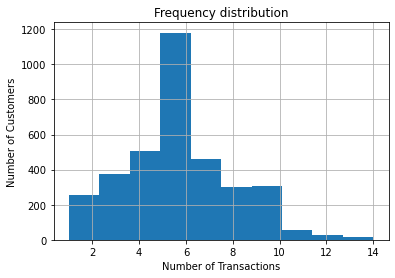

In [55]:
#Let's plot a distribution of the three characteristics in a histogram
f = rfm['frequency'].hist(bins=10)
f.set_title('Frequency distribution')
f.set_xlabel("Number of Transactions")
f.set_ylabel("Number of Customers")

Most customers have made 5 to 6 transactions in total.

Text(0, 0.5, 'Number of Customers')

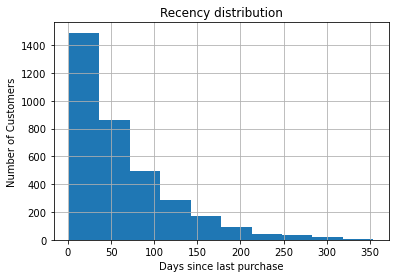

In [58]:
r = rfm['recency'].hist(bins=10)
r.set_title('Recency distribution')
r.set_xlabel("Days since last purchase")
r.set_ylabel("Number of Customers")

Most customers made their most recent purchase less then 50 from the last day.

Text(0, 0.5, 'Number of Customers')

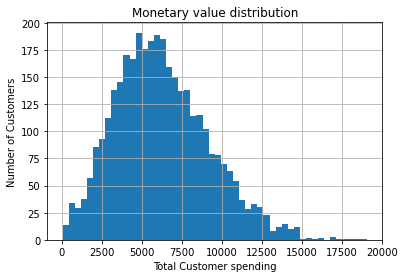

In [57]:
m = rfm['monetary_value'].hist(bins=50)
m.set_title('Monetary value distribution')
m.set_xlabel("Total Customer spending")
m.set_ylabel("Number of Customers")

Most customers have spent between $5,000 and $6,500 in total.

In [39]:
rfm.describe()

,recency,frequency,monetary_value
count,3489.000000,3489.000000,3489.000000
mean,62.375179,5.667240,6279.548790
std,58.408523,2.311635,2945.826838
min,1.000000,1.000000,60.340000
25%,18.000000,4.000000,4153.110000
50%,45.000000,6.000000,5990.410000
75%,87.000000,7.000000,8133.830000
max,354.000000,14.000000,19071.320000


In [40]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
    
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm['R'] = rfm['recency'].apply(RFMScore, args=('recency',quantiles,))
rfm['F'] = rfm['frequency'].apply(RFMScore, args=('frequency',quantiles,))
rfm['M'] = rfm['monetary_value'].apply(RFMScore, args=('monetary_value',quantiles,))
rfm

,recency,frequency,monetary_value,R,F,M
customer_id,,,,,,
1,8,11,9084.45,1,4,4
2,129,3,4149.07,4,1,1
4,196,2,1047.72,4,1,1
5,17,6,5903.20,1,2,2
6,65,5,5931.69,3,2,2
...,...,...,...,...,...,...
3496,257,4,4725.38,4,1,2
3497,53,3,3744.07,3,1,1
3498,128,6,5177.06,4,2,2


In [41]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm

,recency,frequency,monetary_value,R,F,M,RFM_Score
customer_id,,,,,,,
1,8,11,9084.45,1,4,4,9
2,129,3,4149.07,4,1,1,6
4,196,2,1047.72,4,1,1,6
5,17,6,5903.20,1,2,2,5
6,65,5,5931.69,3,2,2,7
...,...,...,...,...,...,...,...
3496,257,4,4725.38,4,1,2,7
3497,53,3,3744.07,3,1,1,5
3498,128,6,5177.06,4,2,2,8


In [42]:
rfm1= rfm.sort_values(by=['RFM_Score'], ascending=False)
rfm1

,recency,frequency,monetary_value,R,F,M,RFM_Score
customer_id,,,,,,,
34,103,8,12098.83,4,4,4,12
2610,113,8,8499.22,4,4,4,12
1988,135,8,10687.63,4,4,4,12
2654,109,9,9905.20,4,4,4,12
2140,99,8,9047.44,4,4,4,12
...,...,...,...,...,...,...,...
3312,7,4,3943.69,1,1,1,3
2817,16,3,4046.61,1,1,1,3
2708,12,3,3437.08,1,1,1,3


In [43]:
#group into different categories (High value, Mid value and low value)
def get_class(df):
    if df['RFM_Score'] >= 9:
        return 'High Value'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Mid Value'
    else:
        return 'Low Value'
    
rfm1['class'] = rfm1.apply(get_class, axis=1)
rfm1[['recency','frequency','monetary_value','R', 'F', 'M', 'RFM_Score', 'class']]

,recency,frequency,monetary_value,R,F,M,RFM_Score,class
customer_id,,,,,,,,
34,103,8,12098.83,4,4,4,12,High Value
2610,113,8,8499.22,4,4,4,12,High Value
1988,135,8,10687.63,4,4,4,12,High Value
2654,109,9,9905.20,4,4,4,12,High Value
2140,99,8,9047.44,4,4,4,12,High Value
...,...,...,...,...,...,...,...,...
3312,7,4,3943.69,1,1,1,3,Low Value
2817,16,3,4046.61,1,1,1,3,Low Value
2708,12,3,3437.08,1,1,1,3,Low Value


In [44]:
rfm1['class'].value_counts()

Mid Value     2088
High Value    1063
Low Value      338
Name: class, dtype: int64

In [45]:
class_stats = rfm1[['class','recency','frequency','monetary_value']].groupby('class').agg(['mean','count'])
class_stats

recency       frequency       monetary_value      
                 mean count      mean count           mean count
class                                                           
High Value  59.922860  1063  8.090310  1063    9447.423584  1063
Low Value   18.183432   338  3.414201   338    3361.857249   338
Mid Value   70.777299  2088  4.798372  2088    5139.093252  2088

1. There are currently 1063 high value customers that the company should work to maintain as they are the biggest spenders and make the most purchases
2. There are currently 2088 mid value customers who the company is at risk of loosing. Their average recent purchase was 70 days ago. Marketing should incentivise them to make more frequent purchases.
3. 338 customers are of low-value category. They are less likely to make any more purchases but the company can alos incentivise them to come back.

In [66]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   name                                 1000 non-null   object 
 1   gender                               1000 non-null   object 
 2   age                                  1000 non-null   float64
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   job_industry_category                835 non-null    object 
 5   wealth_segment                       1000 non-null   object 
 6   owns_car                             1000 non-null   object 
 7   tenure                               1000 non-null   int64  
 8   state                                1000 non-null   object 
 9   property_valuation                   1000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


In [67]:
categories = ['Financial Services', 'Manufacturing', 'Health']
new_customers['job_industry_category'] = new_customers['job_industry_category'].fillna(pd.Series(np.random.choice(categories, size=len(new_customers.index))))
new_customers

,name,gender,age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,Chickie Brister,Male,60.0,86,Manufacturing,Mass Customer,Yes,14,QLD,6
1,Morly Genery,Male,47.0,69,Property,Mass Customer,No,16,NSW,11
2,Ardelis Forrester,Female,43.0,10,Financial Services,Affluent Customer,No,10,VIC,5
3,Lucine Stutt,Female,38.0,64,Manufacturing,Affluent Customer,Yes,5,QLD,1
4,Melinda Hadlee,Female,52.0,34,Financial Services,Affluent Customer,No,19,NSW,9
...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand Romanetti,Male,58.0,60,Financial Services,Affluent Customer,No,9,NSW,7
996,Burk Wortley,Male,16.0,22,Health,Mass Customer,No,6,NSW,10
997,Melloney Temby,Female,63.0,17,Financial Services,Affluent Customer,Yes,15,QLD,2
998,Dickie Cubbini,Male,65.0,30,Financial Services,Mass Customer,Yes,19,QLD,2


#Determine which new customers the marketing team should target based on indights from transactions dataset- Refer to dashborad


1. Target customers from NSW State since 53% of sales come from customers in those regions
2. Target individuals between the ages of 30 and 50 since they bring in around 53% revenue collectively
3. Target Mass customers as they bring in 50% of total revenue
4. Target customers in Manufacturing, Finance, and Health job industries as they collectively contribute 70% of the revenue
5. Target customers who's property valuation is between 6.0 and 9.0
6. The mean, past bike related purchases is 48 so target customers with above average
NB: Gender and whether one owns a bike or not does not affect revenues. The difference is insignificant (2% for car ownership and less than 1% for gender)

Now filter new customer list using the above criteria

In [68]:

idx = np.where((new_customers['age']>=30) & (new_customers['age']<= 50) 
               & (new_customers['state']=='NSW') & (new_customers['wealth_segment']=='Mass Customer')
               & (new_customers['tenure']>=4) & (new_customers['tenure']<=16)
               & (new_customers['property_valuation']>=6) & (new_customers['property_valuation']<=9)
               & (new_customers['past_3_years_bike_related_purchases']>=48))

potential_pool = new_customers.loc[idx]
potential_pool

,name,gender,age,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
32,Sybilla MacCart,Female,30.0,88,Financial Services,Mass Customer,Yes,7,NSW,7
56,Briant Ladley,Male,38.0,75,Argiculture,Mass Customer,No,12,NSW,8
92,Andromache Bonafacino,Female,40.0,84,Retail,Mass Customer,No,11,NSW,9
221,Kort Disley,Male,38.0,66,Health,Mass Customer,Yes,7,NSW,9
253,Celeste Fretson,Female,37.0,91,IT,Mass Customer,No,9,NSW,9
366,Daisi Tinwell,Female,46.0,84,Financial Services,Mass Customer,No,11,NSW,8
421,Etan Prinett,Male,47.0,97,Argiculture,Mass Customer,Yes,10,NSW,8
490,Alexina Mabley,Female,42.0,72,Manufacturing,Mass Customer,Yes,10,NSW,9
531,Amabel,Female,36.0,71,Financial Services,Mass Customer,Yes,9,NSW,6
546,Sammy Borsi,Female,45.0,99,Financial Services,Mass Customer,No,5,NSW,7


In [69]:
potential_pool['job_industry_category'].value_counts()

Financial Services    6
Manufacturing         4
Health                3
Argiculture           2
IT                    2
Retail                1
Name: job_industry_category, dtype: int64

In [70]:

potential_pool['name'].to_list

<bound method IndexOpsMixin.tolist of 32           Sybilla MacCart
56             Briant Ladley
92     Andromache Bonafacino
221              Kort Disley
253          Celeste Fretson
366            Daisi Tinwell
421             Etan Prinett
490           Alexina Mabley
531                   Amabel
546              Sammy Borsi
574             Harlene Nono
607              Ajay Worham
608           Jamison Cashin
721         Jaimie Lancastle
724           Calida Schaben
741            Sinclair Wark
808               Davie Blay
905           Olia O' Mullan
Name: name, dtype: object>

There are 18 potential customers marketing can reach out to